In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [4]:
df = pd.read_csv("/Users/minsu/Desktop/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [14]:
X = df.drop(['Rings'], axis=1)

X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [16]:
y = df['Rings']
y.head()

id
0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [28]:
y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

## 범주형 데이터 생성
0 ~ 7 => Young <br>
8 ~ 12 => Middle <br>
13 ~ => Old 

In [36]:
df['Age_Category'] = pd.cut(df['Rings'], bins=[0, 8, 13, float('inf')], labels=['Young', 'Middle', 'Old'])

X = df.drop(['Rings', 'Age_Category'], axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [40]:
y = df['Age_Category']
y.head()

id
0       Old
1     Young
2    Middle
3    Middle
4     Young
Name: Age_Category, dtype: category
Categories (3, object): ['Young' < 'Middle' < 'Old']

In [42]:
y.value_counts()

Age_Category
Middle    2280
Young     1407
Old        490
Name: count, dtype: int64

In [57]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from tensorflow.keras.layers import Input, Dense

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# 범주형 -> 수치형 데이터 변환
# y_train_cat = pd.get_dummies(y_train)
# y_test_cat = pd.get_dummies(y_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train_cat = to_categorical(y_train_encoded, num_classes=3)
y_test_cat = to_categorical(y_test_encoded, num_classes=3)

In [101]:
model = Sequential([
    Input(shape=(8,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax') # 다중 분류 -> softmax
])

In [103]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,235 (12.64 KB)

 Trainable params: 3,235 (12.64 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
history = model.fit(X_train, y_train_cat, epochs=16, batch_size=32, validation_split=0.2)

Epoch 1/16
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4667 - loss: 0.9964 - val_accuracy: 0.7250 - val_loss: 0.7688
Epoch 2/16
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6693 - loss: 0.8155 - val_accuracy: 0.7294 - val_loss: 0.6978
Epoch 3/16
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6905 - loss: 0.7427 - val_accuracy: 0.7250 - val_loss: 0.6701
Epoch 4/16
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7129 - loss: 0.6884 - val_accuracy: 0.7339 - val_loss: 0.6748
Epoch 5/16
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6917 - loss: 0.7117 - val_accuracy: 0.7369 - val_loss: 0.6362
Epoch 6/16
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7027 - loss: 0.6754 - val_accuracy: 0.7309 - val_loss: 0.6232
Epoch 7/16
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7309 - loss: 0.6288 - val_accuracy: 0.7489 - val_loss: 0.6051
Epoch 8/16
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7257 - loss: 0.6392 - val_accuracy: 0.7444 - v

In [111]:
y_pred_clf =  model.predict(X_test)

acc_nn_clf = accuracy_score(y_test_encoded, y_pred_clf_class)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step


In [113]:
print(f"NN ACC: {acc_nn_clf:.2f}")

NN ACC: 0.72


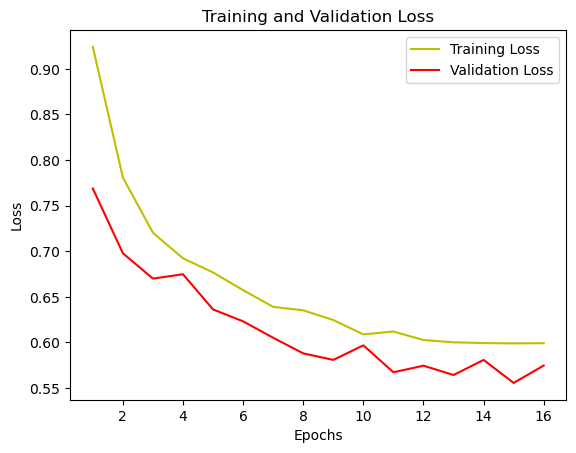

In [119]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

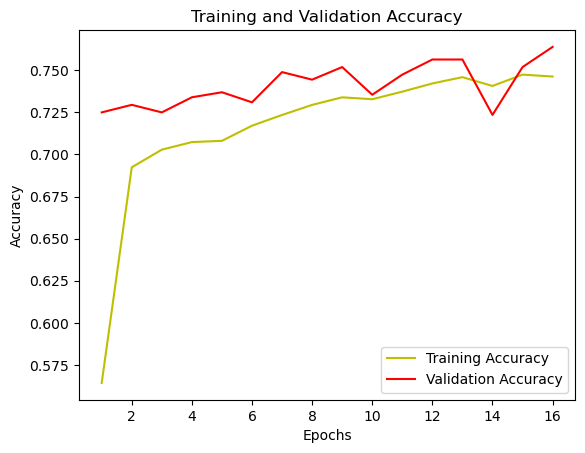

In [121]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [123]:
history_epochs_up = model.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7295 - loss: 0.6143 - val_accuracy: 0.7414 - val_loss: 0.5675
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7591 - loss: 0.5749 - val_accuracy: 0.7608 - val_loss: 0.5579
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7199 - loss: 0.6301 - val_accuracy: 0.7549 - val_loss: 0.5514
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7450 - loss: 0.5971 - val_accuracy: 0.7578 - val_loss: 0.5539
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7407 - loss: 0.6050 - val_accuracy: 0.7534 - val_loss: 0.5627
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7404 - loss: 0.6042 - val_accuracy: 0.7369 - val_loss: 0.5636
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7525 - loss: 0.6067 - val_accuracy: 0.7593 - val_loss: 0.5573
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7541 - loss: 0.5593 - val_accuracy: 0.7369 - v

In [125]:
y_pred_clf =  model.predict(X_test)

acc_nn_clf = accuracy_score(y_test_encoded, y_pred_clf_class)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [127]:
print(f"NN ACC: {acc_nn_clf:.2f}")

NN ACC: 0.72


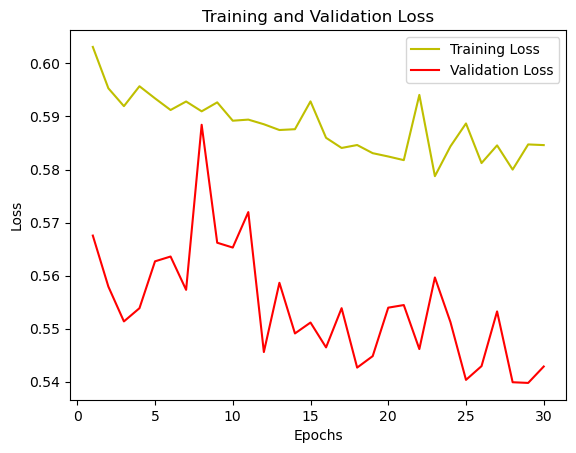

In [131]:
loss = history_epochs_up.history['loss']
val_loss = history_epochs_up.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [133]:
optimizer = Adam(learning_rate=0.0001)  # 학습률을 낮춤
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [139]:
history_epochs_up = model.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7535 - loss: 0.5841 - val_accuracy: 0.7638 - val_loss: 0.5402
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7658 - loss: 0.5508 - val_accuracy: 0.7683 - val_loss: 0.5392
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7371 - loss: 0.6002 - val_accuracy: 0.7623 - val_loss: 0.5391
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7511 - loss: 0.5701 - val_accuracy: 0.7683 - val_loss: 0.5396
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7500 - loss: 0.5708 - val_accuracy: 0.7668 - val_loss: 0.5384
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7559 - loss: 0.5617 - val_accuracy: 0.7698 - val_loss: 0.5391
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7504 - loss: 0.5765 - val_accuracy: 0.7608 - val_loss: 0.5402
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7446 - loss: 0.5857 - val_accuracy: 0.7638 - v

In [141]:
y_pred_clf =  model.predict(X_test)

acc_nn_clf = accuracy_score(y_test_encoded, y_pred_clf_class)
print(f"NN ACC: {acc_nn_clf:.2f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
NN ACC: 0.72


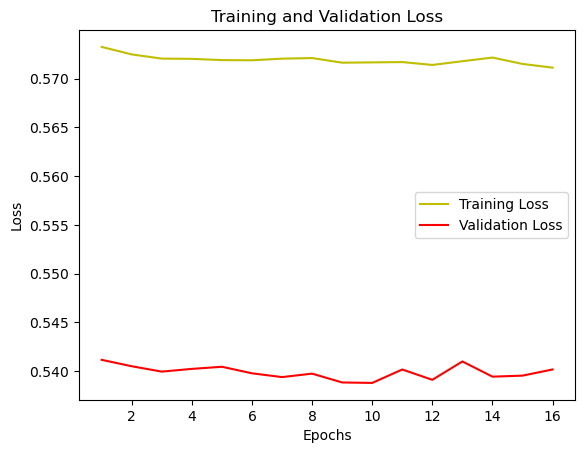

In [143]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [145]:
optimizer = Adam(learning_rate=0.0001)  # 학습률을 낮춤
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [147]:
history_epochs_up = model.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7443 - loss: 0.5855 - val_accuracy: 0.7653 - val_loss: 0.5382
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7513 - loss: 0.5806 - val_accuracy: 0.7728 - val_loss: 0.5377
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7548 - loss: 0.5684 - val_accuracy: 0.7593 - val_loss: 0.5399
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7427 - loss: 0.5911 - val_accuracy: 0.7623 - val_loss: 0.5388
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7530 - loss: 0.5764 - val_accuracy: 0.7713 - val_loss: 0.5386
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7519 - loss: 0.5671 - val_accuracy: 0.7683 - val_loss: 0.5372
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7480 - loss: 0.5841 - val_accuracy: 0.7668 - val_loss: 0.5373
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7555 - loss: 0.5612 - val_accuracy: 0.7683 - v

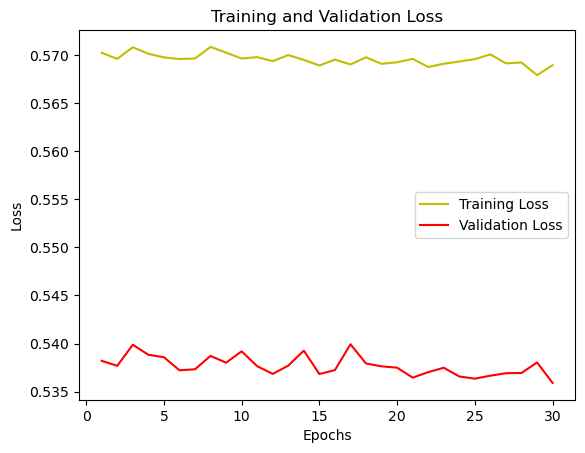

In [151]:
loss = history_epochs_up.history['loss']
val_loss = history_epochs_up.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

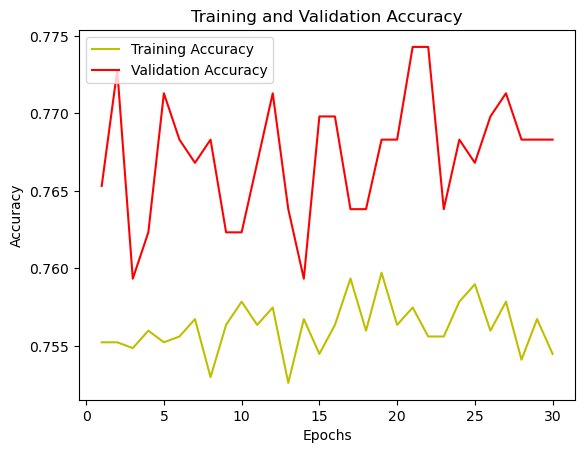

In [153]:
acc = history_epochs_up.history['accuracy']
val_acc = history_epochs_up.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [155]:
optimizer = Adam(learning_rate=0.1)  # 학습률을 낮춤
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [157]:
history_epochs_up = model.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6180 - loss: 1.0583 - val_accuracy: 0.6861 - val_loss: 0.7758
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6791 - loss: 0.7589 - val_accuracy: 0.7265 - val_loss: 0.7145
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7001 - loss: 0.7332 - val_accuracy: 0.7429 - val_loss: 0.7114
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6828 - loss: 0.7534 - val_accuracy: 0.7220 - val_loss: 0.7548
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7041 - loss: 0.7341 - val_accuracy: 0.6667 - val_loss: 0.7277
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7113 - loss: 0.7163 - val_accuracy: 0.7055 - val_loss: 0.6985
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6974 - loss: 0.7167 - val_accuracy: 0.6996 - val_loss: 0.6862
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7315 - loss: 0.6879 - val_accuracy: 0.6846 - v

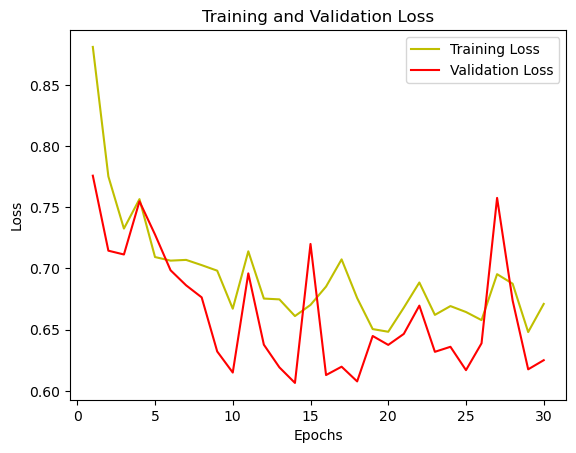

In [159]:
loss = history_epochs_up.history['loss']
val_loss = history_epochs_up.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

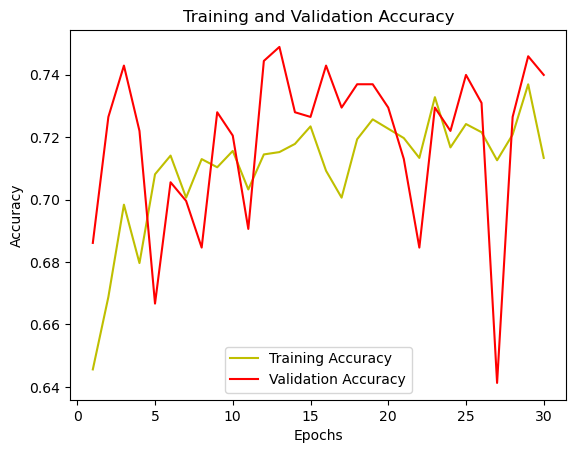

In [161]:
acc = history_epochs_up.history['accuracy']
val_acc = history_epochs_up.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [163]:
from tensorflow.keras.layers import Dropout
model.add(Dropout(0.3))

from tensorflow.keras.layers import BatchNormalization
model.add(BatchNormalization())

In [165]:
history_epochs_up = model.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7107 - loss: 0.6553 - val_accuracy: 0.6891 - val_loss: 0.6634
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7107 - loss: 0.6775 - val_accuracy: 0.6876 - val_loss: 0.7251
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7217 - loss: 0.6486 - val_accuracy: 0.7220 - val_loss: 0.6359
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7022 - loss: 0.6768 - val_accuracy: 0.6876 - val_loss: 0.7078
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6879 - loss: 0.7438 - val_accuracy: 0.7399 - val_loss: 0.6395
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7239 - loss: 0.6734 - val_accuracy: 0.5964 - val_loss: 0.8927
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6964 - loss: 0.7137 - val_accuracy: 0.7429 - val_loss: 0.6109
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7274 - loss: 0.6734 - val_accuracy: 0.7399 - v

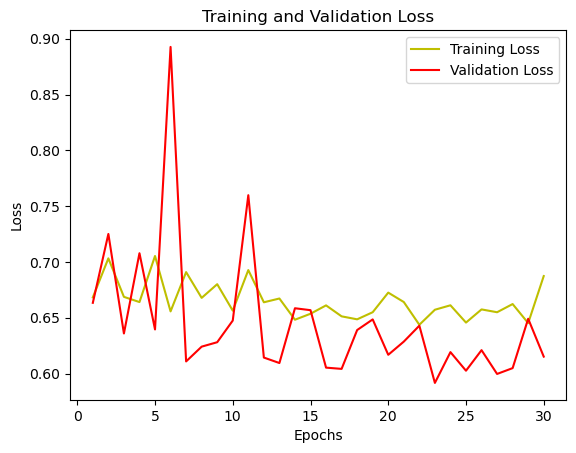

In [167]:
loss = history_epochs_up.history['loss']
val_loss = history_epochs_up.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

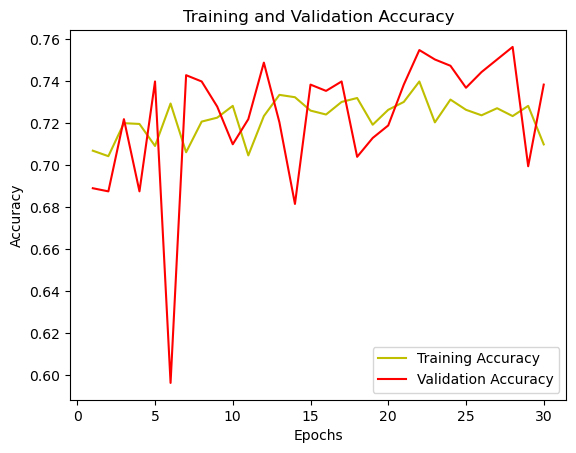

In [169]:
acc = history_epochs_up.history['accuracy']
val_acc = history_epochs_up.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [171]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [173]:
history_epochs_up = model.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5708 - loss: 3.3391 - val_accuracy: 0.7280 - val_loss: 1.2357
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5580 - loss: 3.3537 - val_accuracy: 0.7459 - val_loss: 1.7546
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5510 - loss: 3.1816 - val_accuracy: 0.7504 - val_loss: 2.2196
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5803 - loss: 3.4526 - val_accuracy: 0.7534 - val_loss: 7.7978
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5467 - loss: 2.8726 - val_accuracy: 0.7414 - val_loss: 8.6764
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5480 - loss: 3.1128 - val_accuracy: 0.7324 - val_loss: 9.4066
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5668 - loss: 3.3129 - val_accuracy: 0.7130 - val_loss: 9.1488
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5465 - loss: 3.2403 - val_accuracy: 0.7175 - v

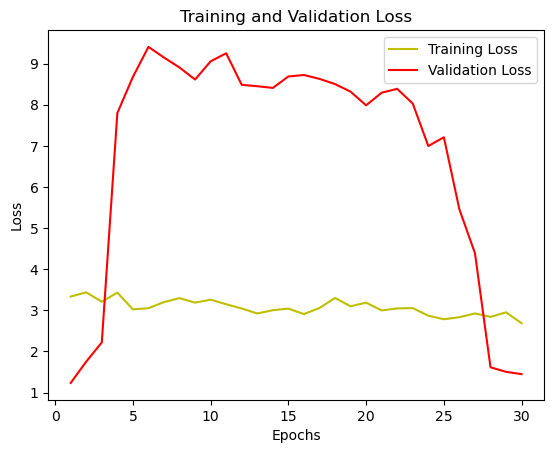

In [175]:
loss = history_epochs_up.history['loss']
val_loss = history_epochs_up.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [181]:
model = Sequential([
    Input(shape=(8,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax') # 다중 분류 -> softmax
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history_epochs_up = model.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_split=0.2)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,067 (47.14 KB)

 Trainable params: 12,067 (47.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5692 - loss: 0.9503 - val_accuracy: 0.7339 - val_loss: 0.7054
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7118 - loss: 0.7319 - val_accuracy: 0.7294 - val_loss: 0.6792
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7152 - loss: 0.7033 - val_accuracy: 0.7369 - val_loss: 0.6648
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7252 - loss: 0.6814 - val_accuracy: 0.7444 - val_loss: 0.6703
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7161 - loss: 0.6743 - val_accuracy: 0.7369 - val_loss: 0.6531
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7232 - loss: 0.6393 - val_accuracy: 0.7070 - val_loss: 0.6450
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7151 - loss: 0.6696 - val_accuracy: 0.7578 - val_loss: 0.5777
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7478 - loss: 0.6023 - val_accuracy: 0.7504 - v

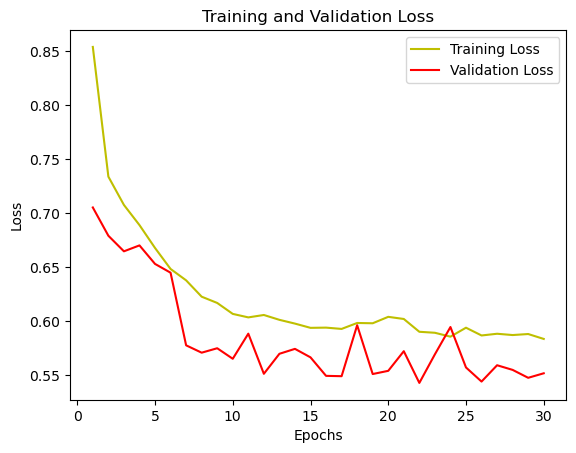

In [183]:
loss = history_epochs_up.history['loss']
val_loss = history_epochs_up.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

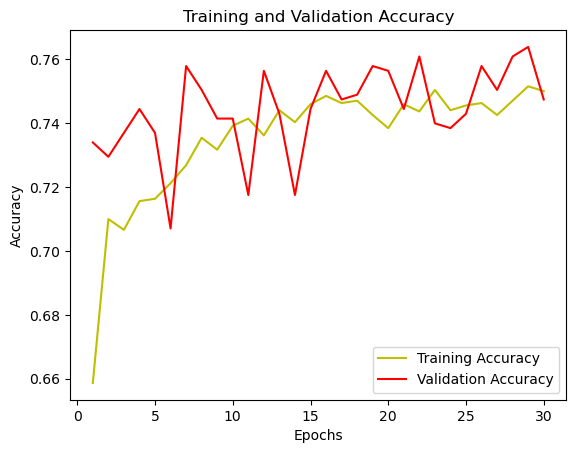

In [186]:
acc = history_epochs_up.history['accuracy']
val_acc = history_epochs_up.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [194]:
# Adam 옵티마이저의 학습률을 0.0005로 낮춤
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7613 - loss: 0.5732 - val_accuracy: 0.7578 - val_loss: 0.5446
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7588 - loss: 0.5710 - val_accuracy: 0.7608 - val_loss: 0.5424
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7619 - loss: 0.5716 - val_accuracy: 0.7519 - val_loss: 0.5650
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7505 - loss: 0.5839 - val_accuracy: 0.7683 - val_loss: 0.5375
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7466 - loss: 0.5697 - val_accuracy: 0.7608 - val_loss: 0.5411
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7543 - loss: 0.5728 - val_accuracy: 0.7578 - val_loss: 0.5412
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7382 - loss: 0.5758 - val_accuracy: 0.7578 - val_loss: 0.5467
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7616 - loss: 0.5628 - val_accuracy: 0.7668 - v

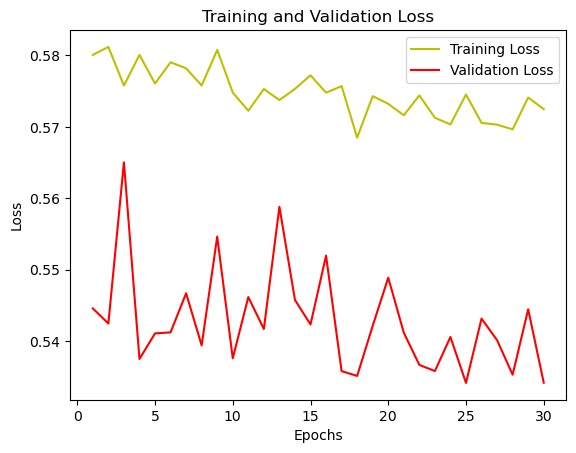

In [196]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

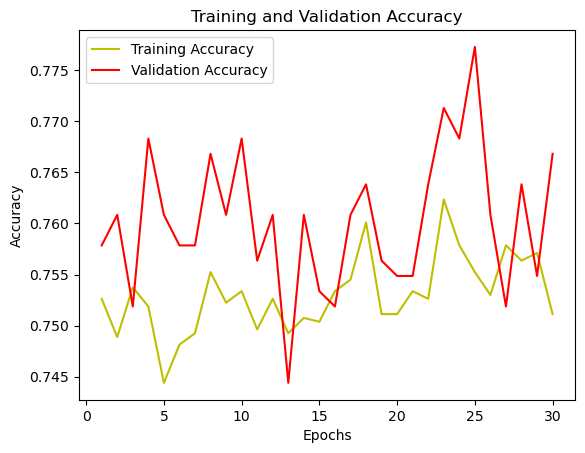

In [198]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [200]:
history = model.fit(X_train, y_train_cat, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7529 - loss: 0.5672 - val_accuracy: 0.7593 - val_loss: 0.5421
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7587 - loss: 0.5592 - val_accuracy: 0.7683 - val_loss: 0.5347
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7601 - loss: 0.5532 - val_accuracy: 0.7578 - val_loss: 0.5374
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7494 - loss: 0.5798 - val_accuracy: 0.7578 - val_loss: 0.5372
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7545 - loss: 0.5614 - val_accuracy: 0.7728 - val_loss: 0.5319
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7482 - loss: 0.5791 - val_accuracy: 0.7623 - val_loss: 0.5356
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7435 - loss: 0.5782 - val_accuracy: 0.7683 - val_loss: 0.5356
Epoch 8/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7700 - loss: 0.5438 - val_accuracy: 0.7519 - v

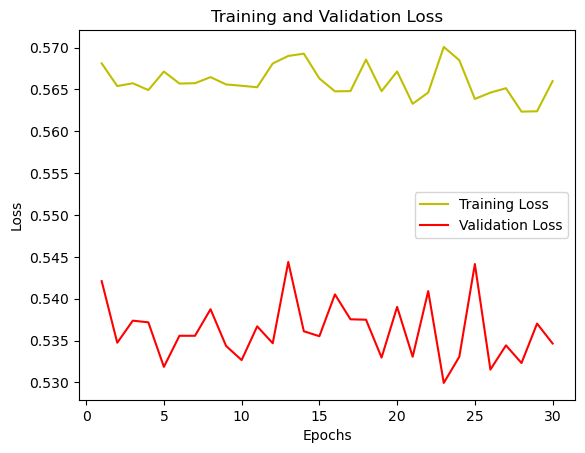

In [202]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

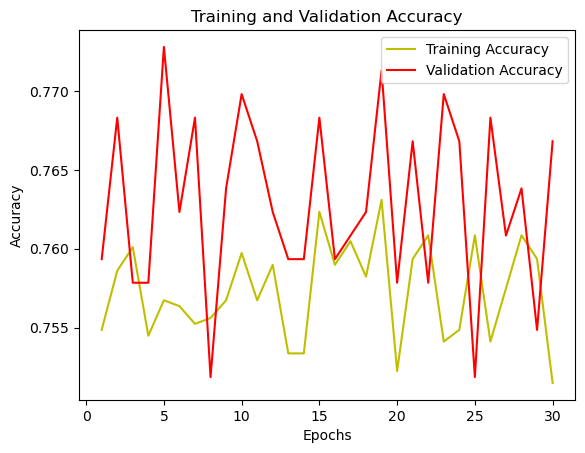

In [204]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [206]:
history = model.fit(X_train, y_train_cat, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7568 - loss: 0.5624 - val_accuracy: 0.7593 - val_loss: 0.5378
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7537 - loss: 0.5811 - val_accuracy: 0.7728 - val_loss: 0.5327
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7621 - loss: 0.5731 - val_accuracy: 0.7743 - val_loss: 0.5325
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7550 - loss: 0.5688 - val_accuracy: 0.7653 - val_loss: 0.5324
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7580 - loss: 0.5626 - val_accuracy: 0.7653 - val_loss: 0.5318
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7638 - loss: 0.5567 - val_accuracy: 0.7564 - val_loss: 0.5334
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7551 - loss: 0.5689 - val_accuracy: 0.7668 - val_loss: 0.5310
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7666 - loss: 0.5409 - val_accuracy: 0.7578 - v

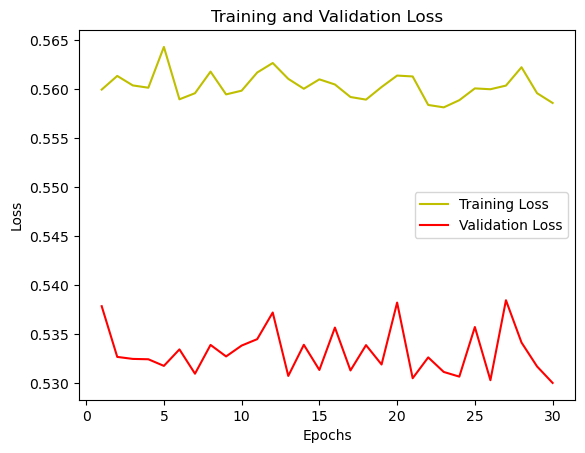

In [208]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

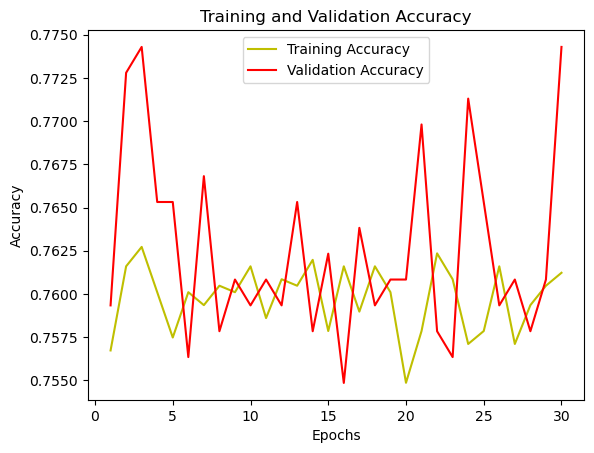

In [210]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [212]:
# Adam 옵티마이저의 학습률을 0.0001로 낮춤
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_cat, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7599 - loss: 0.5516 - val_accuracy: 0.7578 - val_loss: 0.5319
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7629 - loss: 0.5536 - val_accuracy: 0.7653 - val_loss: 0.5309
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7661 - loss: 0.5616 - val_accuracy: 0.7668 - val_loss: 0.5300
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7614 - loss: 0.5552 - val_accuracy: 0.7653 - val_loss: 0.5299
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7698 - loss: 0.5557 - val_accuracy: 0.7608 - val_loss: 0.5311
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7656 - loss: 0.5528 - val_accuracy: 0.7638 - val_loss: 0.5302
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7643 - loss: 0.5559 - val_accuracy: 0.7653 - val_loss: 0.5300
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7731 - loss: 0.5338 - val_accuracy: 0.7638 - v

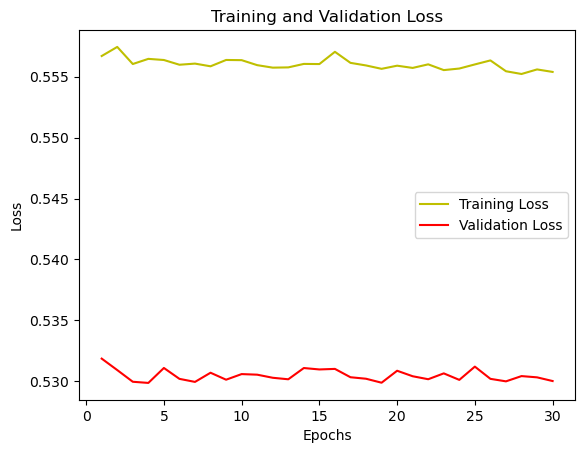

In [214]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

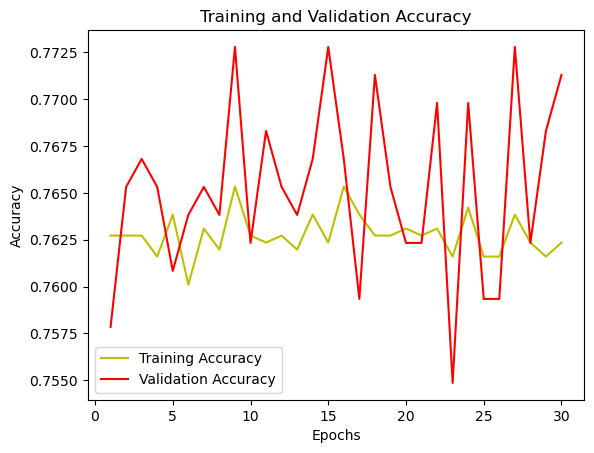

In [216]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [242]:
# Adam 옵티마이저의 학습률을 0.0001로 낮춤
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_cat, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3667 - loss: 7.2664 - val_accuracy: 0.3184 - val_loss: 5.0987
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3575 - loss: 7.2344 - val_accuracy: 0.3109 - val_loss: 4.9416
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3553 - loss: 7.3387 - val_accuracy: 0.3124 - val_loss: 5.0107
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3593 - loss: 7.6266 - val_accuracy: 0.3094 - val_loss: 4.9177
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3475 - loss: 7.4619 - val_accuracy: 0.3094 - val_loss: 4.9199
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3480 - loss: 7.1091 - val_accuracy: 0.3124 - val_loss: 5.0120
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3533 - loss: 7.8334 - val_accuracy: 0.3124 - val_loss: 5.0364
Epoch 8/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3466 - loss: 6.7224 - val_accuracy: 0.3109 - v

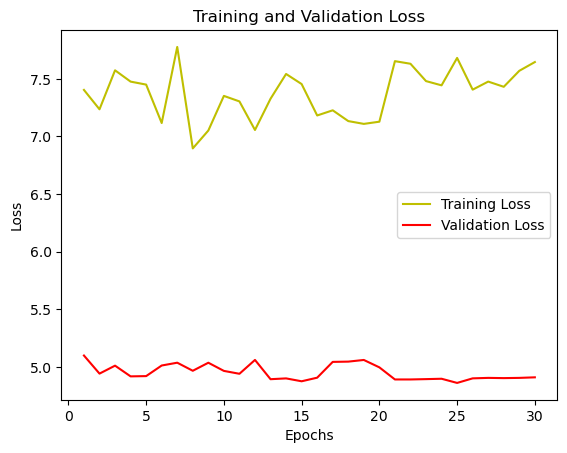

In [244]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

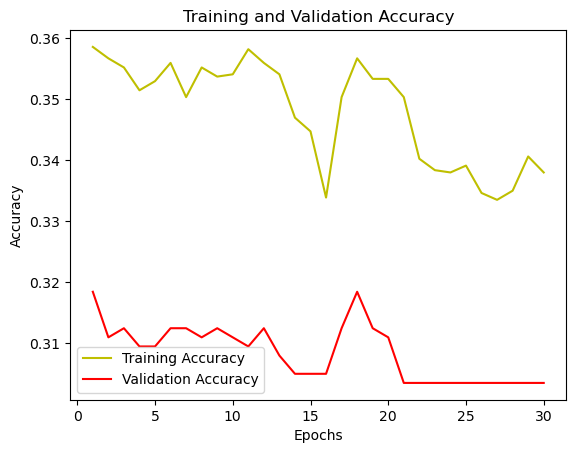

In [246]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [252]:
model = Sequential([
    Input(shape=(8,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax') # 다중 분류 -> softmax
])

In [254]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_cat, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2531 - loss: 1.0459 - val_accuracy: 0.3827 - val_loss: 1.0042
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4762 - loss: 1.0171 - val_accuracy: 0.5949 - val_loss: 0.9684
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5485 - loss: 0.9750 - val_accuracy: 0.5949 - val_loss: 0.9381
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5485 - loss: 0.9606 - val_accuracy: 0.5949 - val_loss: 0.9100
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5470 - loss: 0.9373 - val_accuracy: 0.5949 - val_loss: 0.8838
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5281 - loss: 0.9143 - val_accuracy: 0.5979 - val_loss: 0.8655
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5517 - loss: 0.9130 - val_accuracy: 0.6622 - val_loss: 0.8483
Epoch 8/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6366 - loss: 0.8970 - val_accuracy: 0.6921 - v

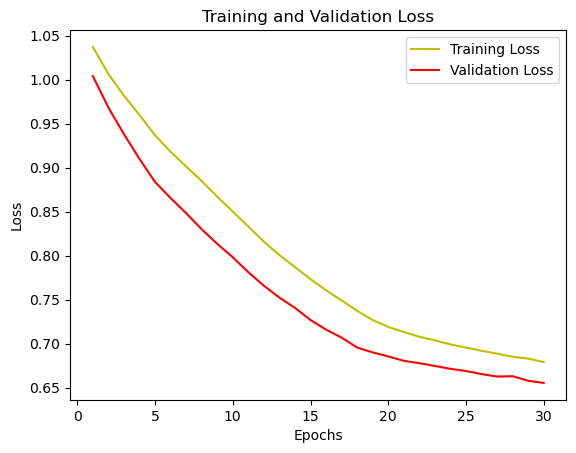

In [256]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

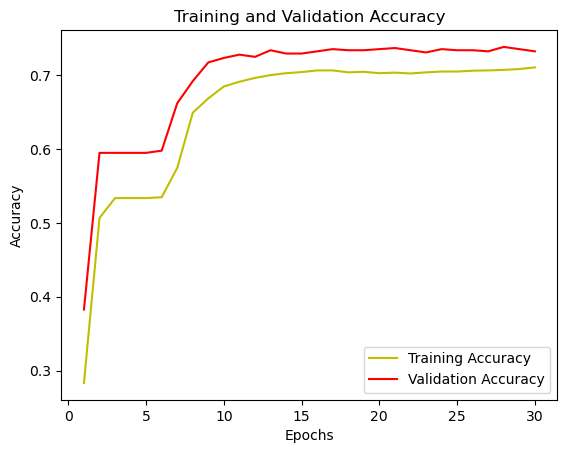

In [258]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 학습률 조정

In [261]:
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [263]:
history = model.fit(X_train, y_train_cat, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6881 - loss: 0.7018 - val_accuracy: 0.7309 - val_loss: 0.6449
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7171 - loss: 0.6650 - val_accuracy: 0.7399 - val_loss: 0.6313
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7196 - loss: 0.6608 - val_accuracy: 0.7429 - val_loss: 0.6193
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7191 - loss: 0.6543 - val_accuracy: 0.7474 - val_loss: 0.6126
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7156 - loss: 0.6378 - val_accuracy: 0.7489 - val_loss: 0.6142
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7395 - loss: 0.6212 - val_accuracy: 0.7474 - val_loss: 0.5917
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7306 - loss: 0.6242 - val_accuracy: 0.7519 - val_loss: 0.5817
Epoch 8/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7494 - loss: 0.6054 - val_accuracy: 0.7444 - v

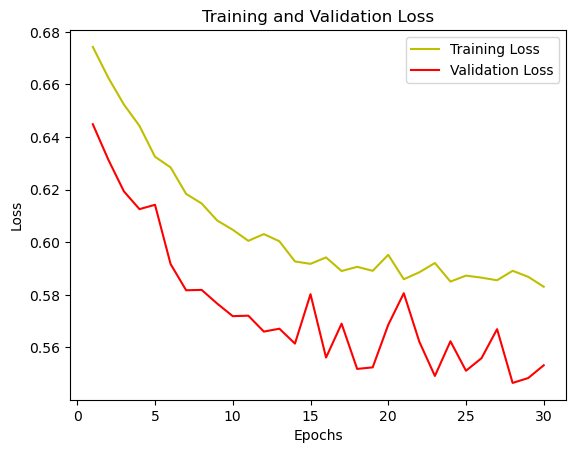

In [265]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

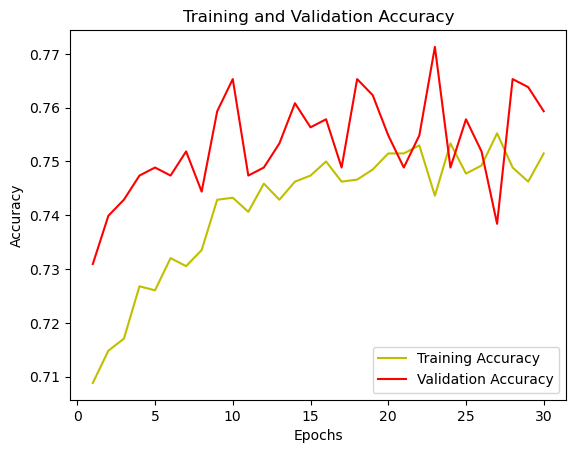

In [267]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## L2 정규화

In [270]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    Input(shape=(8,)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # L2 정규화 추가
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(3, activation='softmax')
])

In [272]:
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [274]:
history = model.fit(X_train, y_train_cat, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5349 - loss: 1.1626 - val_accuracy: 0.5949 - val_loss: 0.9757
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5792 - loss: 1.0033 - val_accuracy: 0.7100 - val_loss: 0.8847
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6915 - loss: 0.9116 - val_accuracy: 0.7235 - val_loss: 0.8291
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6911 - loss: 0.8698 - val_accuracy: 0.7250 - val_loss: 0.8009
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6984 - loss: 0.8314 - val_accuracy: 0.7309 - val_loss: 0.7847
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6953 - loss: 0.8115 - val_accuracy: 0.7235 - val_loss: 0.7562
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7046 - loss: 0.7927 - val_accuracy: 0.7309 - val_loss: 0.7449
Epoch 8/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7073 - loss: 0.7730 - val_accuracy: 0.7220 - v

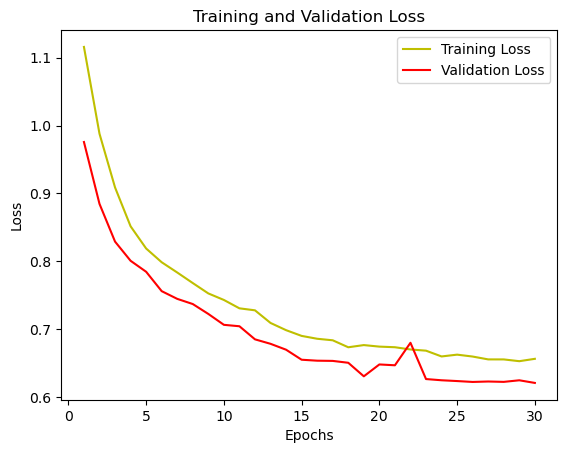

In [276]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

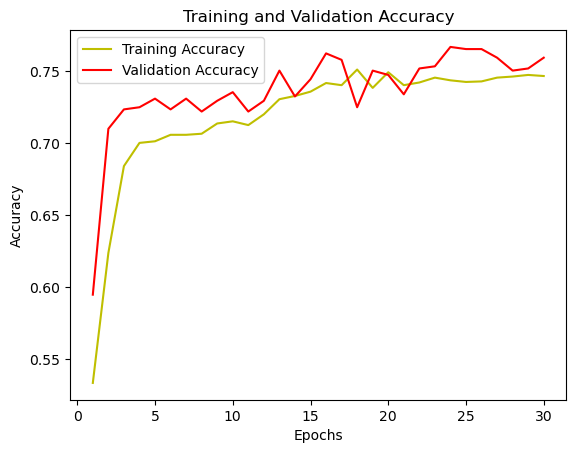

In [278]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## L2 패널티 조정

In [282]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    Input(shape=(8,)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),  # L2 정규화 추가
    Dense(64, activation='relu', kernel_regularizer=l2(0.0001)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.0001)),
    Dense(16, activation='relu', kernel_regularizer=l2(0.0001)),
    Dense(3, activation='softmax')
])

In [284]:
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [286]:
history = model.fit(X_train, y_train_cat, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4802 - loss: 1.0095 - val_accuracy: 0.5979 - val_loss: 0.8360
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6181 - loss: 0.8884 - val_accuracy: 0.7205 - val_loss: 0.7717
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6924 - loss: 0.7944 - val_accuracy: 0.7294 - val_loss: 0.7289
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7044 - loss: 0.7389 - val_accuracy: 0.7160 - val_loss: 0.7051
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6961 - loss: 0.7300 - val_accuracy: 0.7309 - val_loss: 0.6830
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7036 - loss: 0.7018 - val_accuracy: 0.7294 - val_loss: 0.6714
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7237 - loss: 0.6815 - val_accuracy: 0.7414 - val_loss: 0.6544
Epoch 8/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7070 - loss: 0.6928 - val_accuracy: 0.7265 - v

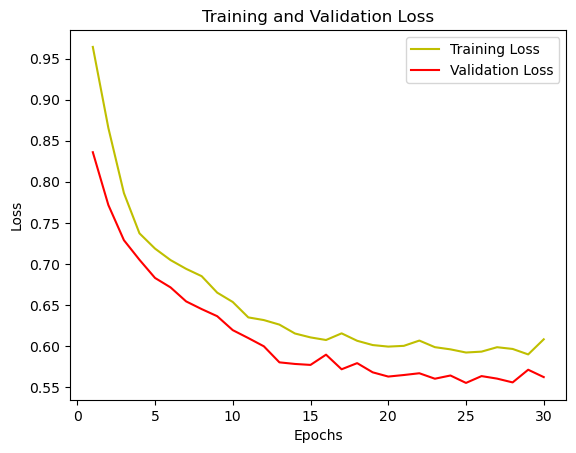

In [288]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

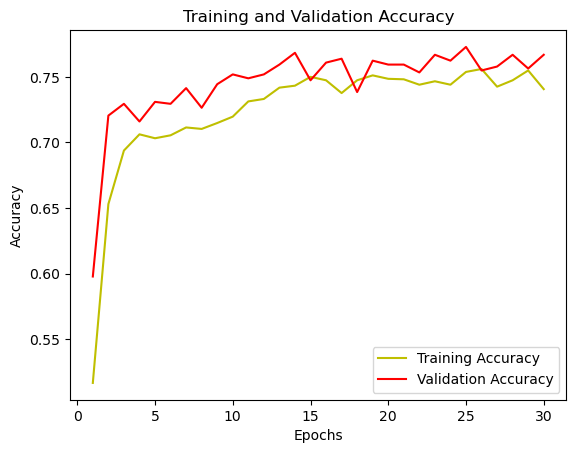

In [290]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## batch 크기 추가

In [296]:
model = Sequential([
    Input(shape=(8,)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),  # L2 정규화 추가
    Dense(64, activation='relu', kernel_regularizer=l2(0.0001)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.0001)),
    Dense(16, activation='relu', kernel_regularizer=l2(0.0001)),
    Dense(3, activation='softmax')
])

# Adam 옵티마이저 설정
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습 (배치 사이즈를 128로 조정)
history = model.fit(X_train, y_train_cat, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5197 - loss: 1.0692 - val_accuracy: 0.5949 - val_loss: 0.9551
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5327 - loss: 0.9750 - val_accuracy: 0.5949 - val_loss: 0.8893
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5220 - loss: 0.9523 - val_accuracy: 0.6308 - val_loss: 0.8652
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5895 - loss: 0.9028 - val_accuracy: 0.6966 - val_loss: 0.8266
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6641 - loss: 0.8694 - val_accuracy: 0.7175 - val_loss: 0.7795
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6898 - loss: 0.8020 - val_accuracy: 0.7294 - val_loss: 0.7501
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7017 - loss: 0.7669 - val_accuracy: 0.7280 - val_loss: 0.7252
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7103 - loss: 0.7387 - val_accuracy: 0.7324 - v

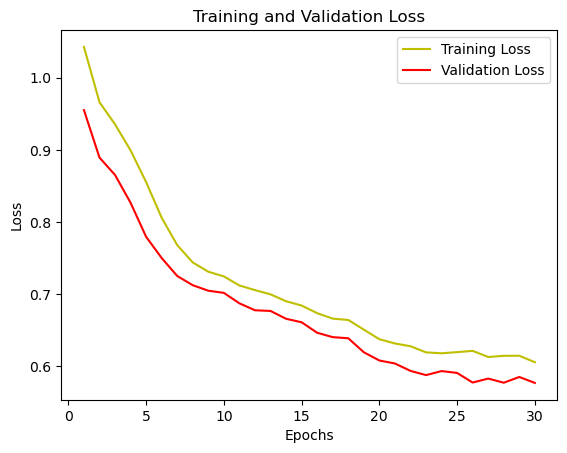

In [302]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

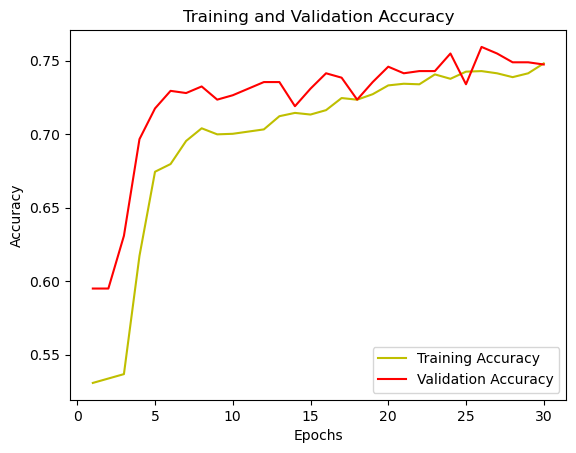

In [300]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Early Stopping

In [305]:
from tensorflow.keras.callbacks import EarlyStopping

In [331]:
model = Sequential([
    Input(shape=(8,)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),  # L2 정규화 추가
    Dense(64, activation='relu', kernel_regularizer=l2(0.0001)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.0001)),
    Dense(16, activation='relu', kernel_regularizer=l2(0.0001)),
    Dense(3, activation='softmax')
])

In [333]:
# Adam 옵티마이저 설정
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 학습 (Early Stopping 적용)
history = model.fit(X_train, y_train_cat, epochs=30, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5360 - loss: 1.0596 - val_accuracy: 0.6951 - val_loss: 0.8301
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6569 - loss: 0.8740 - val_accuracy: 0.7294 - val_loss: 0.7497
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6895 - loss: 0.7963 - val_accuracy: 0.7324 - val_loss: 0.7173
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7023 - loss: 0.7375 - val_accuracy: 0.7339 - val_loss: 0.7099
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7089 - loss: 0.7194 - val_accuracy: 0.7250 - val_loss: 0.6899
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7069 - loss: 0.7136 - val_accuracy: 0.7130 - val_loss: 0.6773
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7133 - loss: 0.6891 - val_accuracy: 0.7399 - val_loss: 0.6587
Epoch 8/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7102 - loss: 0.6852 - val_accuracy: 0.7145 - v

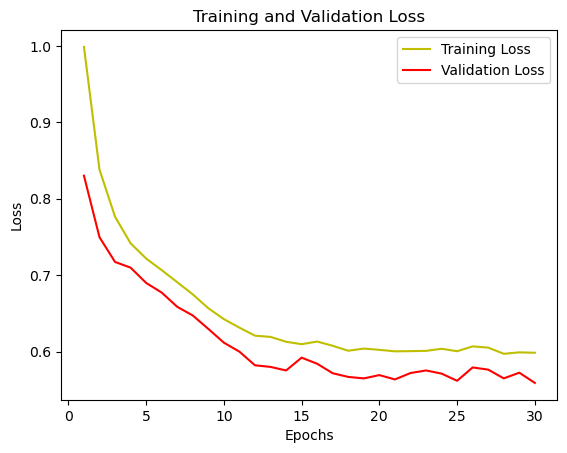

In [334]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

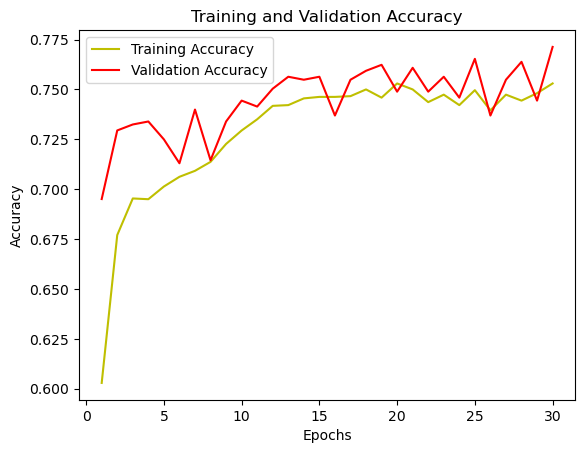

In [335]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Gradient Clipping

In [357]:
optimizer = Adam(learning_rate=0.0005, clipvalue=1.0)  # clipvalue를 설정
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [359]:
history = model.fit(X_train, y_train_cat, epochs=30, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7508 - loss: 0.6088 - val_accuracy: 0.7683 - val_loss: 0.5594
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7507 - loss: 0.5952 - val_accuracy: 0.7683 - val_loss: 0.5565
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7399 - loss: 0.6099 - val_accuracy: 0.7608 - val_loss: 0.5565
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7512 - loss: 0.5928 - val_accuracy: 0.7564 - val_loss: 0.5573
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7476 - loss: 0.6013 - val_accuracy: 0.7399 - val_loss: 0.5707


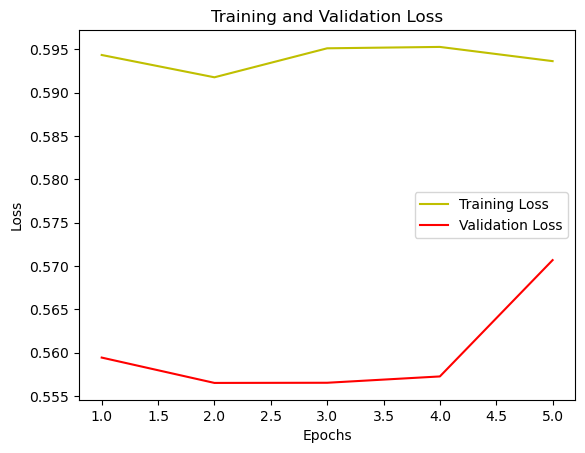

In [360]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

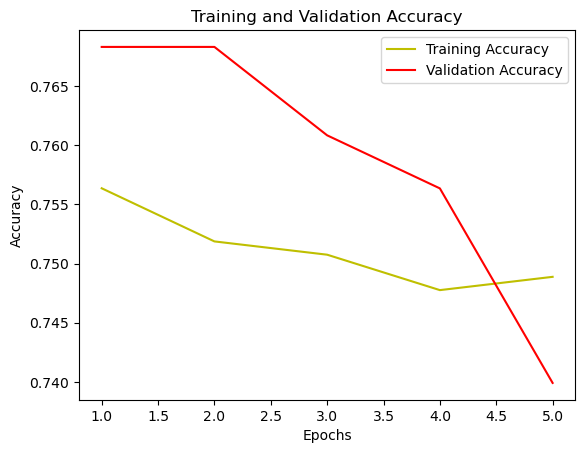

In [361]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### clipvalue 조절 1.0 -> 3.0

In [365]:
optimizer = Adam(learning_rate=0.0005, clipvalue=3.0)  # clipvalue를 설정
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_cat, epochs=30, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7438 - loss: 0.5972 - val_accuracy: 0.7429 - val_loss: 0.5725
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7477 - loss: 0.6036 - val_accuracy: 0.7728 - val_loss: 0.5555
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7532 - loss: 0.5980 - val_accuracy: 0.7623 - val_loss: 0.5602
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7433 - loss: 0.5965 - val_accuracy: 0.7623 - val_loss: 0.5569
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7552 - loss: 0.5922 - val_accuracy: 0.7653 - val_loss: 0.5542
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7336 - loss: 0.6083 - val_accuracy: 0.7668 - val_loss: 0.5553
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7418 - loss: 0.6062 - val_accuracy: 0.7758 - val_loss: 0.5550
Epoch 8/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7494 - loss: 0.5934 - val_accuracy: 0.7549 - v

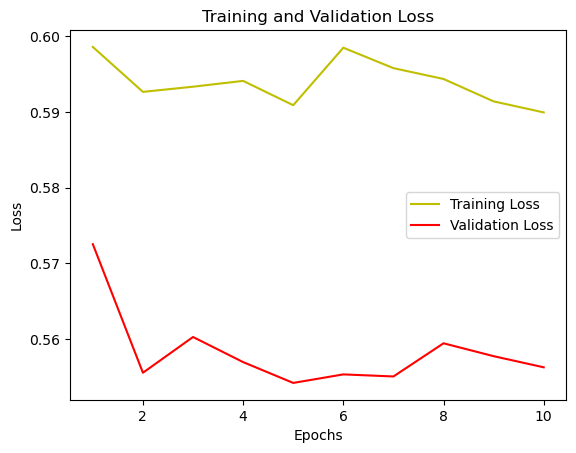

In [367]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

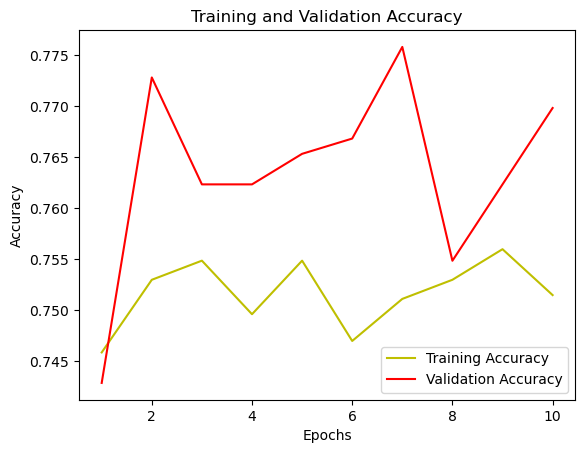

In [369]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()